## Student: Deng, Zixuan (V00971633)
# Problem 2. Bundles [40 points]

In this problem, we will use the d-dimensional PCA projections of Fashion-MNIST images obtained
in the previous problem. Implement the following clustering algorithms on this projected dataset:

#### import packages 

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

#### Prepare data required for Problem 3

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Get each class contains 500 items
result_0_index = (y_train == 0)
result_0_y = (y_train[result_0_index])[:500]
result_0_X = (X_train[result_0_index])[:500]
print(result_0_X)
print(result_0_X.shape)

result_1_index = (y_train == 1)
result_1_y = y_train[result_1_index][:500]
result_1_X = (X_train[result_1_index])[:500]

result_2_index = (y_train == 2)
result_2_y = (y_train[result_2_index])[:500]
result_2_X = (X_train[result_2_index])[:500]

result_3_index = (y_train == 3)
result_3_y = (y_train[result_3_index])[:500]
result_3_X = (X_train[result_3_index])[:500]

result_4_index = (y_train == 4)
result_4_y = (y_train[result_4_index])[:500]
result_4_X = (X_train[result_4_index])[:500]

result_5_index = (y_train == 5)
result_5_y = (y_train[result_5_index])[:500]
result_5_X = (X_train[result_5_index])[:500]

result_6_index = (y_train == 6)
result_6_y = (y_train[result_6_index])[:500]
result_6_X = (X_train[result_6_index])[:500]

result_7_index = (y_train == 7)
result_7_y = (y_train[result_7_index])[:500]
result_7_X = (X_train[result_7_index])[:500]

result_8_index = (y_train == 8)
result_8_y = (y_train[result_8_index])[:500]
result_8_X = (X_train[result_8_index])[:500]

result_9_index = (y_train == 9)
result_9_y = (y_train[result_9_index])[:500]
result_9_X = (X_train[result_9_index])[:500]
print(result_9_y)

# the new X has downsample to 5000 elements
new_X = np.concatenate((result_0_X, result_1_X, result_2_X, result_3_X, result_4_X, result_5_X, result_6_X, result_7_X, result_8_X, result_9_X), axis=0)

new_y = np.concatenate((result_0_y, result_1_y, result_2_y, result_3_y, result_4_y, result_5_y, result_6_y, result_7_y, result_8_y, result_9_y), axis=0)

X = new_X.reshape(new_X.shape[0], -1) / 255. 

#  explain 80% of the variance
pca = PCA(.8)
eighty_data = pca.fit_transform(X)
# check # of components require
print(pca.n_components_)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 1 ... 2 0 0]
  [0 0 2 ... 1 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 1 ... 1 0 0]
  [0 0 0 ... 0 0 0]]]
(500, 28, 28)
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9

In [15]:
eighty_data.shape

(5000, 24)

The $d$-dimensional PCA projections of Fashion-MNIST images obtained in problem 1 is eighty_data and new_y for class label. 

## 2.1 Lloyd [25 points] 
Implement Lloyd’s algorithm from scratch. Use the Euclidean distance, and use the following two initialization techniques:

*   random initialization [10 points]: the centers are initialized to a set of k distinct examples from the dataset drawn uniformly at random;
*   k-means++ initialization [15 points]: check the slides for details. You must implement
this step yourself as well.


For each version of Lloyd’s algorithm, try different values of $k$ (from 2 to 15). For each value
of $k$, you can run the clustering multiple times and pick the best result. Make a plot of the
cost (sum of the squared errors from each point to its cluster center) as $k$ increases. Using the
plot, decide how many clusters to use, and explain your choice (hint: the lecture slides might
be helpful!). How well does the best clustering correspond to the true labels? Do classes always
entirely fall within a single cluster (if $k$ ≤ 10) or not? What happens if $k$ = 10?
 

### Implement Lloyd's algorithm use Random Initialization 

- def random 

In [174]:
# def random(df, k):
#     """
#     to randomly generate initialization centroid points 

#     parameters: 
#     df: np array, input dataset
#     k: int, number of clusters 
#     return: 
#     centroids: np array, k centroid
#     """

#     # generate an array with random integers
#     rd_int = np.random.randint(0,df.shape[0], size = k)

#     centroids = df[rd_int]

#     return centroids


def k_means_pp_init(df, k):
    """
    to k means ++ initialization centroid points 

    parameters: 
    df: np array, input dataset
    k: int, number of clusters 
    return: 
    centroids: np array, k centroid
    """
    centroids = []
    dis = []
    # generate an array with random integers
    rd_int = np.random.randint(0,df.shape[0], size = 1)

    first_centroid = df[rd_int]
    centroids.append(first_centroid)


    if k>2: 
        for i in range(k-1):
            for m in df:
                distance = euclidean_distance(m,centroids[i])
                dis.append(distance)
                # print("distance,", dis)
                # print(np.argmax(dis))
            cl = dis.index(max(dis))
            centroids.append(df[cl])
            # np.delete(df, cl)

    return centroids




def euclidean_distance(a,b):
    """
    return the euclidean_distance between two data point

    parameters: 
    a: np array, input data
    b: np array, input data

    return: 
    euclidean_distance between two data point
    """
    return np.linalg.norm(a-b)


def assign_cluster(df, centroids, k):

    cluster = []
    for _ in range(k):
        cluster.append([])
    # size of cluster and centroids are the same. 
    for i in df:
        distance = [euclidean_distance(i,c) for c in centroids]
        # print("distance")
        # print(distance)
        cl = distance.index(min(distance))
        # print("index")
        # print(cl)
        # print('sdascsssssssssss')
        cluster[cl].append(i)
    
    return cluster


def reassign_centroid(df, cluster, k, centroids):
    new_centroids = centroids
    # print(new_centroids)
    # for _ in range(k):
    #     new_centroids.append([])
    index = 0 
    for i in cluster:
        data_in_cluster = np.array(i)
        new_c = np.mean(data_in_cluster, axis=0)
        # print('new_centered points')
        # print(new_c)
        # if mean exist
        if new_c != 'nan':
            new_centroids[index] = new_c
        
        index +=1
    return new_centroids

# def cluster_change(old_cluster, new_cluster):

#     # distance = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(new_centroids.shape[0])]
#     # result = sum(distance) != 0 # true means cluster change. 
#     result = sum(old_cluster != new_cluster) 
#     return result

In [153]:
# do K means 
def k_means(df, k, mode): 
    # assume mode equals either "random init" or "k_means_pp"
    if mode == "random init":
        n = np.random.randint(0,df.shape[0], size = k)
        original_centroid = df[n]
    else: 
        original_centroid = k_means_pp_init(df, k)

    
    original_cluster = assign_cluster(df, original_centroid, k)
    new_centroid = reassign_centroid(df, original_cluster, k, original_centroid)

    count = 0
    while count<11:
      # if False, will drop out of while loop. so if the cluster does not change, then it converges. 
        new_cluster = assign_cluster(df, new_centroid, k)
        new_new_centroid = reassign_centroid(df, new_cluster, k, new_centroid)
        count+=1

    # print(new_centroid)

    return new_centroid, new_cluster


def cost(df,k, centroids, cluster):

    cost = 0 

    for i in range(len(cluster)):
       
        distance = [euclidean_distance(cluster[i],centroid[i])]

    for m in distance: 
        cost = cost + m 
    
    return cost 
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


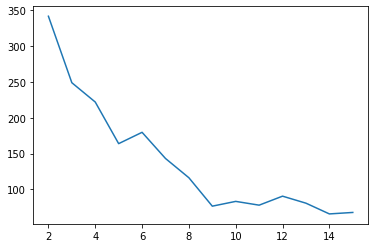

In [154]:
# plot the cost vs k. 

k_list = [2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15]
cost_list = []

for k in k_list: 
    centroid, new_cluster = k_means(eighty_data, k, "random init")
    c = cost(eighty_data,k, centroid, new_cluster)
    cost_list.append(c)

import matplotlib

matplotlib.pyplot.plot(k_list, cost_list)

In [ ]:
k_list = [2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15]
cost_list = []

for k in k_list: 
    centroid, new_cluster = k_means(eighty_data, k, "k_means_pp")
    c = cost(eighty_data,k, centroid, new_cluster)
    cost_list.append(c)

import matplotlib

matplotlib.pyplot.plot(k_list, cost_list)

### Discussion 
Based on the plot of cost vs k, I find k = 9 is the optimal choose. 

In [176]:
print(k_means(eighty_data, 9, "random init"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(array([[-4.28311693e+00,  3.87607159e+00, -2.00211076e+00,
        -1.03543173e+00, -3.49223946e-01,  1.59554237e-01,
        -1.00724920e+00,  4.32977294e-01, -1.04447019e+00,
         5.80848416e-01, -3.39203952e-01,  1.23900338e-01,
         1.48346427e-01, -1.46963315e-01, -1.67546068e-01,
         1.30770699e-01,  1.60874966e-01,  5.99541547e-02,
        -1.53219676e-01, -1.43857466e-01, -7.92127582e-02,
        -7.80668784e-02, -1.98175174e-02, -2.06152463e-01],
       [ 5.65779445e+00,  2.51298880e+00,  1.95109694e+00,
        -1.46178801e-01, -5.78238979e-01, -8.25954881e-01,
        -9.22966913e-02, -3.26571402e-01, -2.21599689e-01,
        -2.64730533e-02,  1.62909804e-02, -2.52585640e-03,
        -2.41618759e-02, -7.61676608e-02,  5.15459699e-02,
         4.19395787e-02,  1.03039771e-02, -1.02342580e-01,
        -6.90410588e-02, -4.11740433e-02, -3.22800610e-02,
         3.39678064e-02, -9.33402190e-03, -3.89803243e-02],
       [ 9.84840796e-01,  3.16916331e+00, -2.43421927

## 2.2 Hierarchical [15 points] 
Run hierarchical agglomerative clustering on this dataset. You should use Euclidean distance for the dissimilarity measure between the two examples. For the
dissimilarity measure between clusters, you should use both single linkage and average linkage. You do not need to implement this yourself: feel free to use sklearn. What is happening here? Do clusters correspond to the true labels or not? Plot the dendrogram, somehow decide what
the final clustering is (by making a cut in the dendrogram), and explain your reasoning behind
this decision

**Reference:**
To draw the dandrogram, I have refered the code from

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

Both Average and single linkage dendrogram plot code are referred from above link. 


In [116]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



In [117]:
# Single linkage 

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'single', distance_threshold=0)
y_hc = hc.fit_predict(eighty_data)
model = hc.fit(eighty_data)

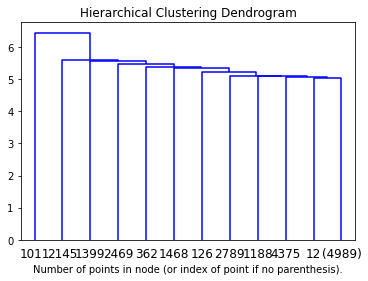

In [118]:
from scipy.cluster.hierarchy import dendrogram
# plot dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

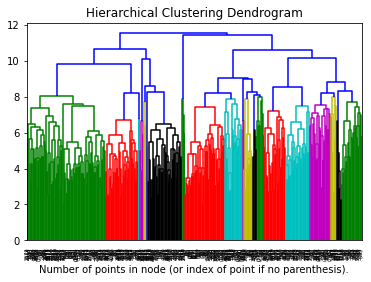

In [119]:
# Average linkage 

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = None, affinity = 'euclidean', linkage = 'average', distance_threshold=0)
y_hc = hc.fit_predict(eighty_data)
model = hc.fit(eighty_data)

from scipy.cluster.hierarchy import dendrogram
# plot dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### short discussion

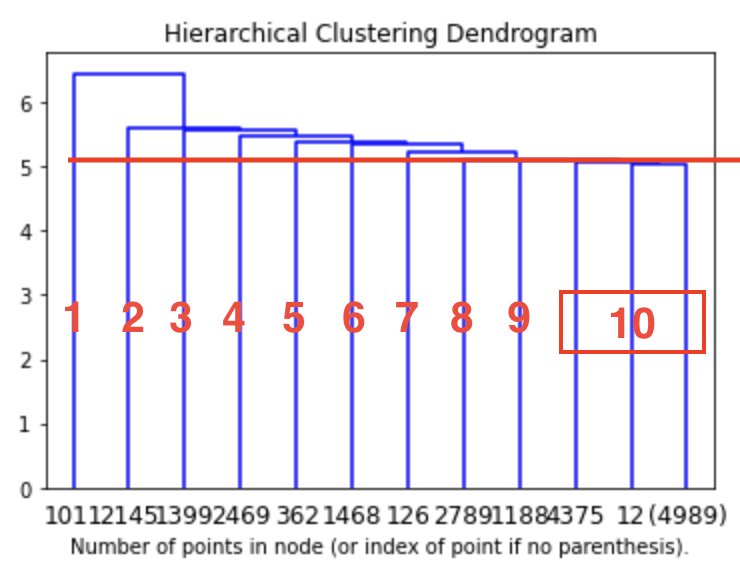

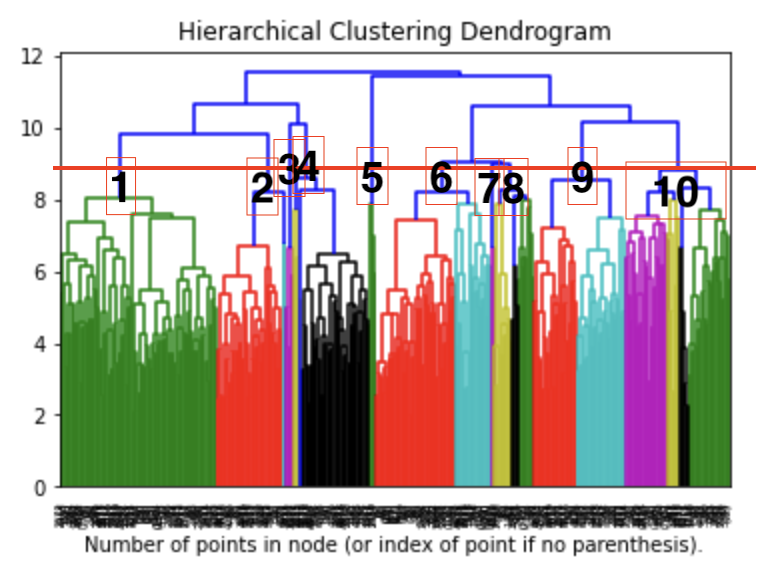

The line in each dendrogram has cut the in 10 clusters. In original dataset, it has labels from 0 to 9, so totally there are 10 categories. 

As the two dendrogram shows there are total 10 clusters after cutting. When finding the number of clusters, we will need to look at the cluster indicate below the curve. If it's indicate three subclusters are in the same big clusters, then it's in the same cluster. And we totally need to find the curve that cut for 10 clusters. 

# Reference: 
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

To draw the dandrogram..

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

from scipy.cluster.hierarchy import dendrogram, linkage




K_means ++ initializtaion: 
https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html